Final Code


Missing values:
 Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


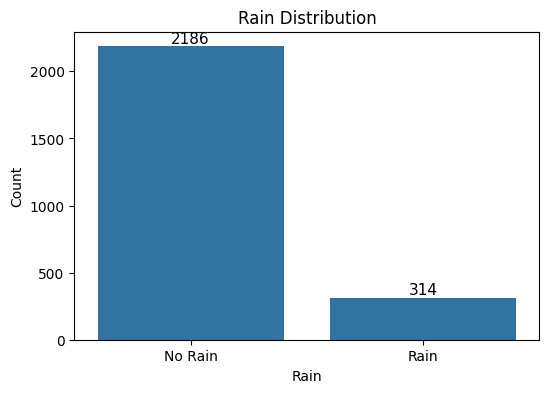

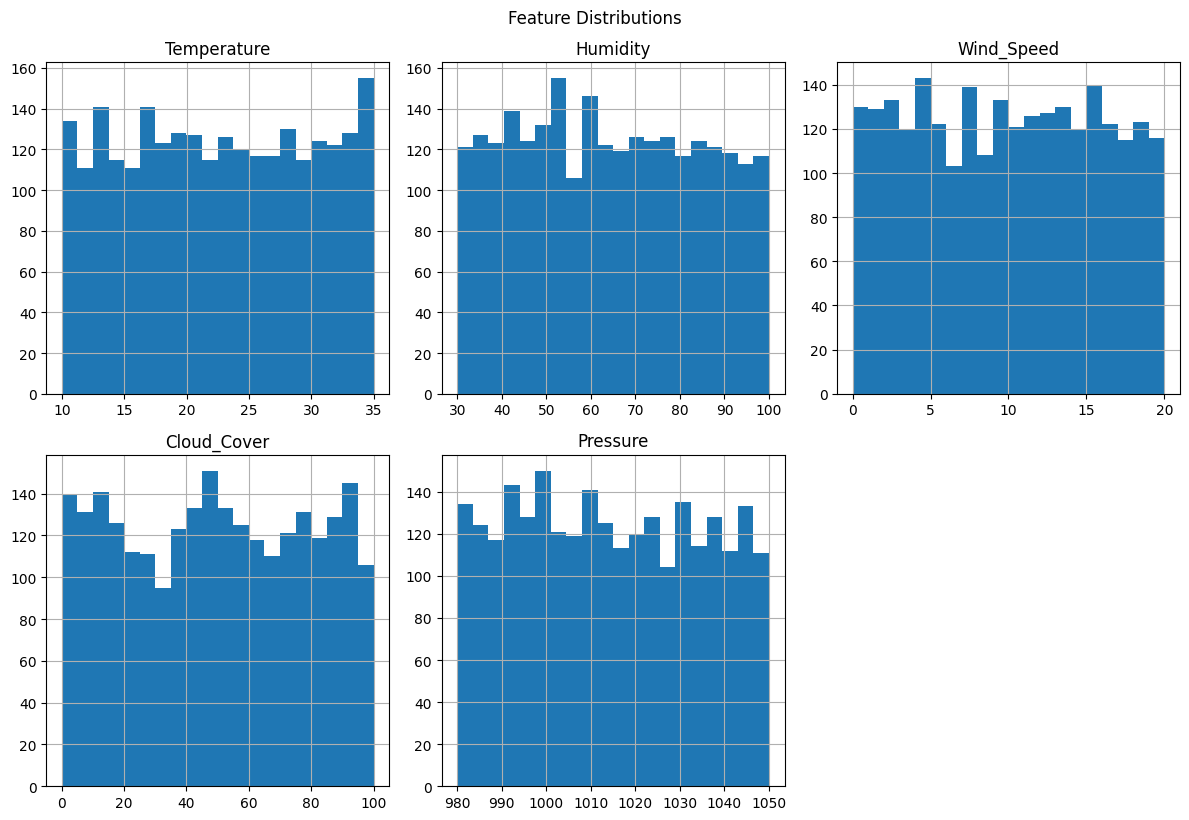


Model Accuracy: 99.80%


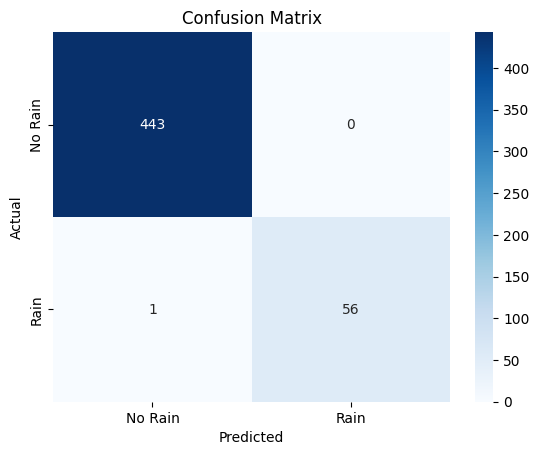


Feature Importances:
Humidity       0.380593
Cloud_Cover    0.314673
Temperature    0.277017
Wind_Speed     0.014140
Pressure       0.013577
dtype: float64


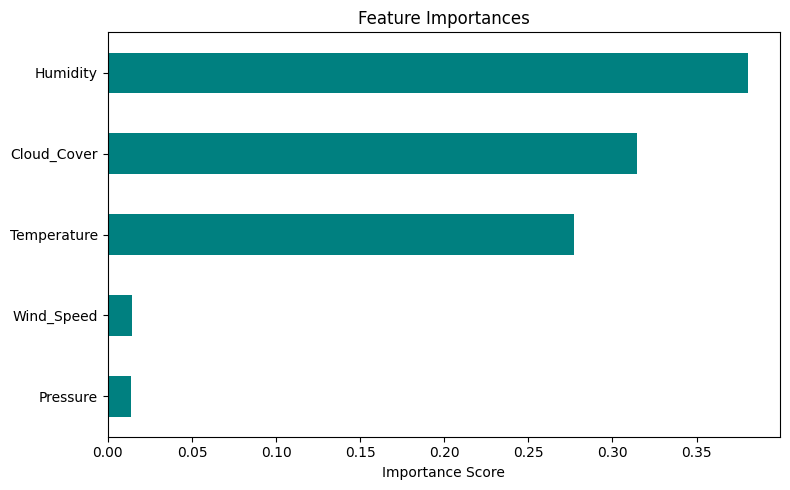

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Weather Forecast Dataset.csv")

# Encode target column 'Rain' (0 = no rain, 1 = rain)
df['Rain'] = LabelEncoder().fit_transform(df['Rain'])

#DATA VISUALIZATION

# 1. Check for missing values
print("Missing values:\n", df.isnull().sum())

# 2. Plot class distribution with values on bars
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Rain', data=df)
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.title("Rain Distribution")
plt.xlabel("Rain")
plt.ylabel("Count")

# Add text labels
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.show()


# 3. Histograms of feature distributions
df.drop('Rain', axis=1).hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

#MODEL TRAINING

# Split features and target
X = df.drop('Rain', axis=1)
y = df['Rain']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Rain", "Rain"],
            yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importance.sort_values(ascending=False))

# Plot feature importances
plt.figure(figsize=(8, 5))
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [18]:
# Example input for prediction
# [Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure]
sample = [[30.0, 75.0, 7.0, 44.0, 1000.0]]

# Predict
prediction = model.predict(sample)
print("Prediction:", "Rain" if prediction[0] == 1 else "No Rain")


Prediction: No Rain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
# Example input for prediction
# [Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure]
sample = [[23.7203,89.592,7.3356,50.5016,1032.3787]]

# Predict
prediction = model.predict(sample)
print("Prediction:", "Rain" if prediction[0] == 1 else "No Rain")


Prediction: Rain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
